快速排序

In [1]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        # 找到从i到n中最小的元素的索引
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        
        # 将找到的最小元素交换到它的位置
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
def test():
    # 执行数据输入
    arr = [64, 25, 12, 22, 11]
    print("原始数组:", arr)
    
    # 调用 selection_sort 函数进行排序
    selection_sort(arr)
    
    # 输出结果
    print("排序后的数组:", arr)

# 调用 test 函数进行测试
test()

原始数组: [64, 25, 12, 22, 11]
排序后的数组: [11, 12, 22, 25, 64]


试着输入一行代码，查看执行效果：

In [2]:
print('Hello World!')

Hello World!


In [3]:
import numpy as np
def square(x):
    return x * x


In [4]:
x = np.random.randint(1, 10)
y = square(x)
print('%d squared is %d' % (x, y))


5 squared is 25


In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


使用pandas

In [6]:
df = pd.read_csv('fortune500.csv')#读取文件

In [7]:
df.head()#查看前5行

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [8]:
df.tail()#查看最后5行

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [9]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']#设置列名

In [10]:
len(df)#查看条目数

25500

In [11]:
df.dtypes#查看不同列的数据类型,profit存在异常

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [12]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')#检查非数字的列情况
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [13]:
len(df.profit[non_numberic_profits])#查看总共有多少非数字的收益

369

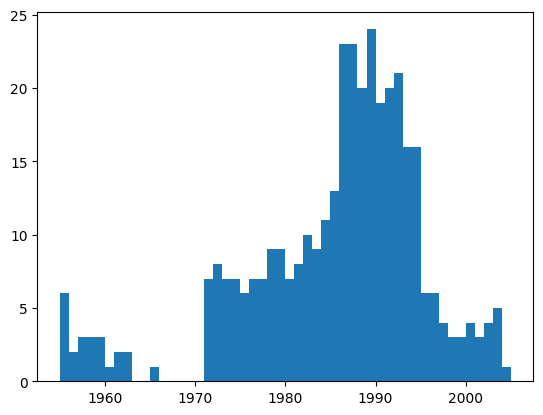

In [14]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))#用直方图查看非数字收益的大体情况

In [15]:
df = df.loc[~non_numberic_profits]#删除这些非法记录
df.profit = df.profit.apply(pd.to_numeric)

In [16]:
len(df)#删除后查看条目数

25131

In [17]:
df.dtypes#重新查看数据类型,现在正常

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

matplotlib使用

In [19]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')#以年分组绘制平均利润和收入
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)


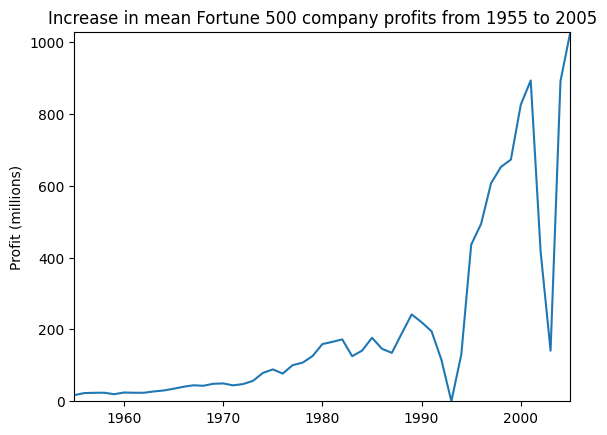

In [20]:
fig, ax = plt.subplots()#1990年类似指数增长,但之后急剧下降
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

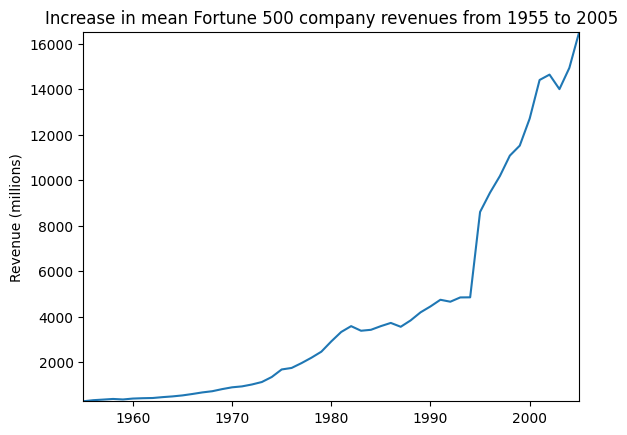

In [21]:
y2 = avgs.revenue#查看平均收入曲线
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

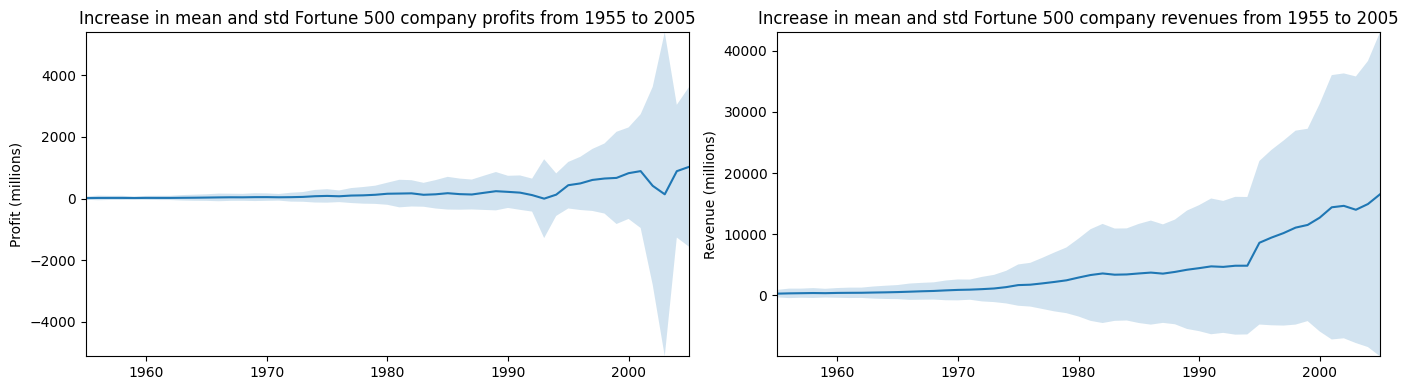

In [22]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

In [ ]:
根据标准差来查看前10%和后10%谁的波动更大

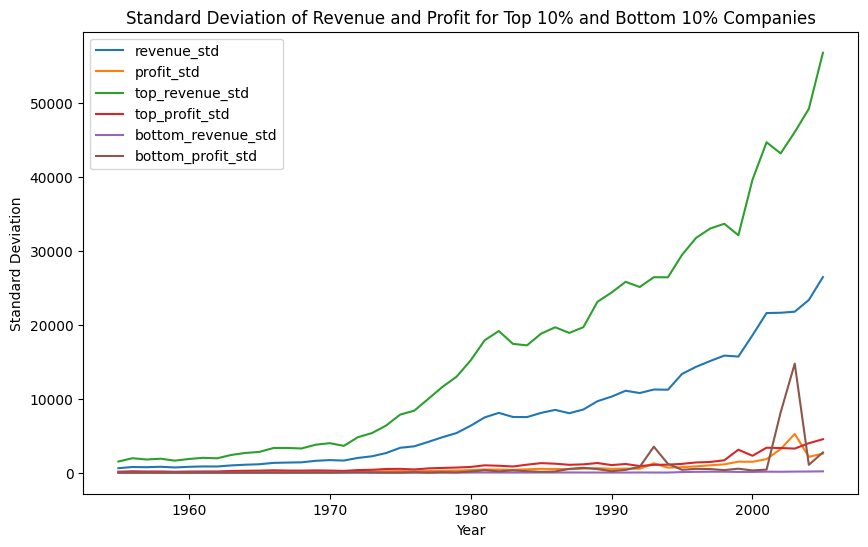

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 加载数据集
df = pd.read_csv('fortune500.csv')

# 重命名列
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

# 清洗数据，删除无效的利润记录
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

# 按年份分组
group_by_year = df.groupby('year')

# 准备存储标准差的DataFrame
std_devs = pd.DataFrame()

# 计算每一年前10%和后10%公司的收入和利润的标准差
for year, group in group_by_year:
    revenue_std = group.revenue.std()
    profit_std = group.profit.std()
    top_revenue_std = group.revenue.nlargest(int(len(group) * 0.1)).std()
    top_profit_std = group.profit.nlargest(int(len(group) * 0.1)).std()
    bottom_revenue_std = group.revenue.nsmallest(int(len(group) * 0.1)).std()
    bottom_profit_std = group.profit.nsmallest(int(len(group) * 0.1)).std()
    std_devs = pd.concat([std_devs, pd.DataFrame({
        'year': [year],
        'revenue_std': [revenue_std],
        'profit_std': [profit_std],
        'top_revenue_std': [top_revenue_std],
        'top_profit_std': [top_profit_std],
        'bottom_revenue_std': [bottom_revenue_std],
        'bottom_profit_std': [bottom_profit_std]
    })], ignore_index=True)

# 绘制结果
plt.figure(figsize=(10, 6))
for column in std_devs.columns[1:]:
    plt.plot(std_devs['year'], std_devs[column], label=column)

plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Revenue and Profit for Top 10% and Bottom 10% Companies')
plt.legend()
plt.show()


In [ ]:
很明显年份的影响更大